In [1]:
!pip install missingno
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
import missingno as msno
sns.set_theme(style="whitegrid")
%matplotlib inline 


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
cuaca = pd.read_json("https://database-sensor-iklim-litbang-default-rtdb.asia-southeast1.firebasedatabase.app/auto_weather_stat/id-02/data.json")
#geomagnetik = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/geomagnetic_stat/id-01/data.json")

In [3]:
cuacaT=cuaca.transpose()
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
2024-11-19 15:27:58,25.39519,84.69772,1006.469,28.22575,1.732030e+09,3.93500
2024-11-19 15:28:13,25.39295,84.69962,1006.462,28.22308,1.732030e+09,3.93500
2024-11-19 15:28:28,25.36930,84.65957,1006.459,28.20706,1.732030e+09,3.93500
2024-11-19 15:28:43,25.36768,84.62524,1006.462,28.21240,1.732030e+09,3.93500
2024-11-19 15:28:58,25.38750,84.63287,1006.464,28.23109,1.732030e+09,3.93500
2024-11-19 15:29:13,25.37890,84.62905,1006.457,28.22308,1.732030e+09,3.93500
2024-11-19 15:29:28,25.39168,84.65385,1006.454,28.23109,1.732030e+09,3.93625
2024-11-19 15:29:43,25.37634,84.64240,1006.457,28.21774,1.732030e+09,3.93625
2024-11-19 15:29:58,25.36878,84.61761,1006.452,28.21507,1.732030e+09,3.93625
2024-11-19 15:30:13,25.37581,84.60044,1006.456,28.22575,1.732030e+09,3.92750


In [4]:
cuacaT.describe()

,dew,humidity,pressure,temperature,timestamp,volt
count,50767.000000,50767.000000,50767.000000,50767.000000,5.076700e+04,50767.000000
mean,25.987930,83.353994,1005.953658,29.140735,1.731584e+09,3.798850
std,1.028528,4.394912,1.448653,1.700564,2.353213e+05,0.173209
min,23.696810,68.332420,1002.294000,26.647590,1.731173e+09,3.456250
25%,25.098015,82.434615,1004.960000,27.798510,1.731389e+09,3.643750
50%,25.789830,84.501260,1005.903000,28.746470,1.731594e+09,3.807500
75%,26.731280,86.189290,1007.032000,30.064275,1.731785e+09,3.933750
max,28.380070,89.574880,1009.455000,34.434270,1.732030e+09,4.136250


In [5]:
cuacaT['timestamp']= cuacaT['timestamp'].astype(int)
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
2024-11-19 15:27:58,25.39519,84.69772,1006.469,28.22575,1732030078,3.93500
2024-11-19 15:28:13,25.39295,84.69962,1006.462,28.22308,1732030093,3.93500
2024-11-19 15:28:28,25.36930,84.65957,1006.459,28.20706,1732030108,3.93500
2024-11-19 15:28:43,25.36768,84.62524,1006.462,28.21240,1732030123,3.93500
2024-11-19 15:28:58,25.38750,84.63287,1006.464,28.23109,1732030138,3.93500
2024-11-19 15:29:13,25.37890,84.62905,1006.457,28.22308,1732030153,3.93500
2024-11-19 15:29:28,25.39168,84.65385,1006.454,28.23109,1732030168,3.93625
2024-11-19 15:29:43,25.37634,84.64240,1006.457,28.21774,1732030183,3.93625
2024-11-19 15:29:58,25.36878,84.61761,1006.452,28.21507,1732030198,3.93625
2024-11-19 15:30:13,25.37581,84.60044,1006.456,28.22575,1732030213,3.92750


In [6]:
# Menampilkan 10 data terakhir
cuacaT.head(10)

,dew,humidity,pressure,temperature,timestamp,volt
2024-11-09 17:20:12,25.53065,79.65270,1008.189,29.42741,1731172812,4.07250
2024-11-09 17:20:27,25.51747,79.57832,1008.172,29.43008,1731172827,4.07750
2024-11-09 17:20:42,25.49097,79.34371,1008.172,29.45411,1731172842,4.07125
2024-11-09 17:20:57,25.50145,79.49058,1008.168,29.43275,1731172857,4.07500
2024-11-09 17:21:12,25.47544,79.46578,1008.165,29.41138,1731172872,4.07375
2024-11-09 17:21:27,25.62236,80.20966,1008.153,29.40070,1731172887,4.07500
2024-11-09 17:21:42,25.70172,80.56252,1008.140,29.40604,1731172902,4.07000
2024-11-09 17:21:57,25.67747,80.40993,1008.133,29.41405,1731172917,4.07250
2024-11-09 17:22:12,25.61698,80.22110,1008.124,29.39269,1731172932,4.07375
2024-11-09 17:22:27,25.59418,80.05135,1008.123,29.40604,1731172947,4.07125


In [7]:
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
2024-11-19 15:27:58,25.39519,84.69772,1006.469,28.22575,1732030078,3.93500
2024-11-19 15:28:13,25.39295,84.69962,1006.462,28.22308,1732030093,3.93500
2024-11-19 15:28:28,25.36930,84.65957,1006.459,28.20706,1732030108,3.93500
2024-11-19 15:28:43,25.36768,84.62524,1006.462,28.21240,1732030123,3.93500
2024-11-19 15:28:58,25.38750,84.63287,1006.464,28.23109,1732030138,3.93500
2024-11-19 15:29:13,25.37890,84.62905,1006.457,28.22308,1732030153,3.93500
2024-11-19 15:29:28,25.39168,84.65385,1006.454,28.23109,1732030168,3.93625
2024-11-19 15:29:43,25.37634,84.64240,1006.457,28.21774,1732030183,3.93625
2024-11-19 15:29:58,25.36878,84.61761,1006.452,28.21507,1732030198,3.93625
2024-11-19 15:30:13,25.37581,84.60044,1006.456,28.22575,1732030213,3.92750


In [8]:
# Tentukan batas bawah dan batas atas waktu yang wajar dalam format UNIX
start_timestamp = pd.Timestamp('2020-01-01').timestamp()  # UNIX time untuk 1 Januari 2020
end_timestamp = pd.Timestamp.now().timestamp()  # UNIX time saat ini

# Hapus data dengan timestamp di luar rentang waktu yang wajar
cuacaT = cuacaT[(cuacaT['timestamp'] >= start_timestamp) & (cuacaT['timestamp'] <= end_timestamp)]

In [9]:
# Konversi timestamp ke datetime dalam format UTC
cuacaT['timestamp'] = pd.to_datetime(cuacaT['timestamp'], unit='s', utc=True)

# Mengonversi ke zona waktu WIB (Asia/Jakarta)
cuacaT['timestamp'] = cuacaT['timestamp'].dt.tz_convert('Asia/Jakarta')

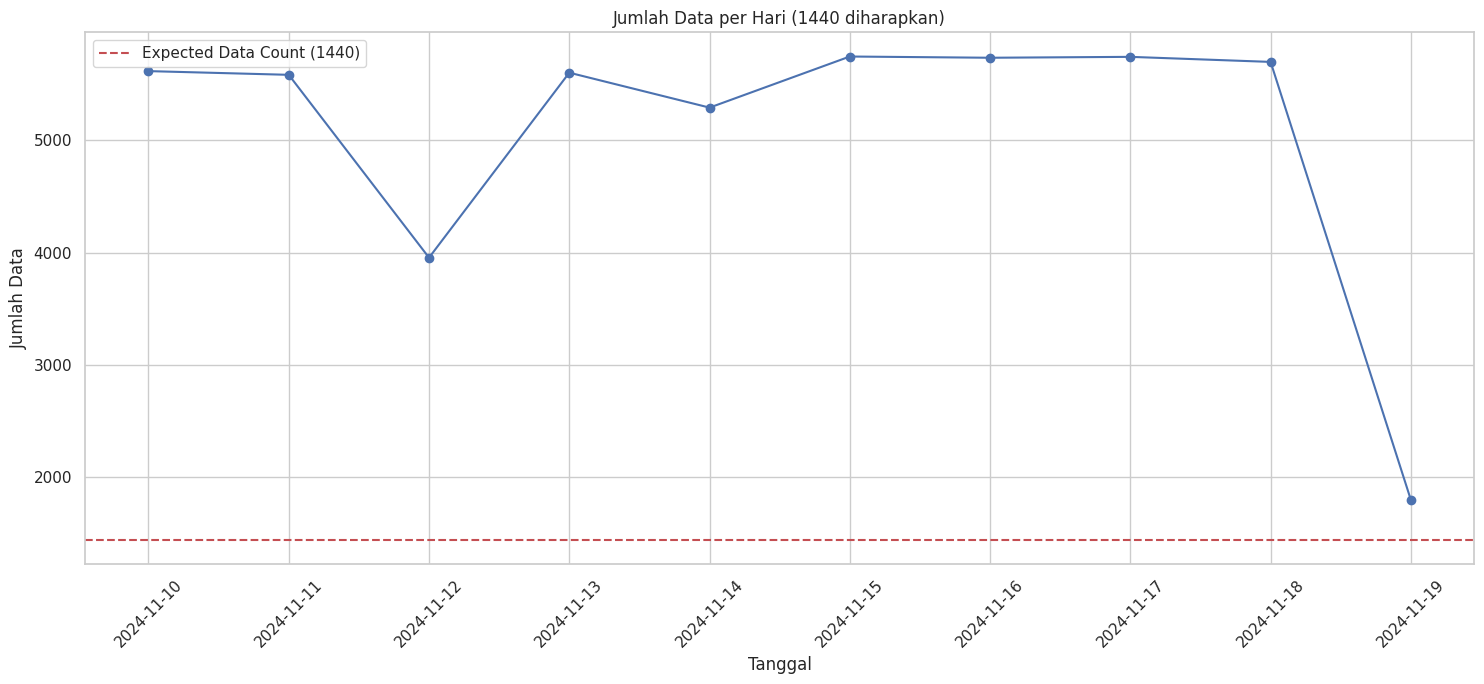

Hari dengan jumlah data yang kurang dari 1440:
         date  count
0  2024-11-10   5616
1  2024-11-11   5583
2  2024-11-12   3955
3  2024-11-13   5602
4  2024-11-14   5291
5  2024-11-15   5746
6  2024-11-16   5735
7  2024-11-17   5743
8  2024-11-18   5698
9  2024-11-19   1798


In [10]:

# Mengelompokkan data berdasarkan hari
cuacaT['date'] = cuacaT['timestamp'].dt.date
data_per_day = cuacaT.groupby('date').size().reset_index(name='count')

# Visualisasi jumlah data per hari
plt.figure(figsize=(15, 7))
plt.plot(data_per_day['date'], data_per_day['count'], marker='o', linestyle='-')
plt.axhline(y=1440, color='r', linestyle='--', label='Expected Data Count (1440)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Hari (1440 diharapkan)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Menampilkan hari-hari yang tidak memenuhi 1440 data
days_with_missing_data = data_per_day[data_per_day['count'] != 1440]
print("Hari dengan jumlah data yang kurang dari 1440:")
print(days_with_missing_data)

In [11]:
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt,date
2024-11-19 15:27:58,25.39519,84.69772,1006.469,28.22575,2024-11-19 22:27:58+07:00,3.93500,2024-11-19
2024-11-19 15:28:13,25.39295,84.69962,1006.462,28.22308,2024-11-19 22:28:13+07:00,3.93500,2024-11-19
2024-11-19 15:28:28,25.36930,84.65957,1006.459,28.20706,2024-11-19 22:28:28+07:00,3.93500,2024-11-19
2024-11-19 15:28:43,25.36768,84.62524,1006.462,28.21240,2024-11-19 22:28:43+07:00,3.93500,2024-11-19
2024-11-19 15:28:58,25.38750,84.63287,1006.464,28.23109,2024-11-19 22:28:58+07:00,3.93500,2024-11-19
2024-11-19 15:29:13,25.37890,84.62905,1006.457,28.22308,2024-11-19 22:29:13+07:00,3.93500,2024-11-19
2024-11-19 15:29:28,25.39168,84.65385,1006.454,28.23109,2024-11-19 22:29:28+07:00,3.93625,2024-11-19
2024-11-19 15:29:43,25.37634,84.64240,1006.457,28.21774,2024-11-19 22:29:43+07:00,3.93625,2024-11-19
2024-11-19 15:29:58,25.36878,84.61761,1006.452,28.21507,2024-11-19 22:29:58+07:00,3.93625,2024-11-19
2024-11-19 15:30:13,25.37581,84.60044,1006.456,28.22575,2024-11-19 22:30:13+07:00,3.92750,2024-11-19


In [12]:
# Simpan DataFrame 'cuacaT' ke file CSV bernama 'Cuaca.csv'
cuacaT.to_csv(
#cuacaT.tail(43200).to_csv(
    'cuaca.csv', 
    sep=',',
    index=False,
    index_label='timestamp'
)

In [13]:
datacuaca = pd.read_csv("/work/cuaca.csv")

In [14]:
datacuaca

,dew,humidity,pressure,temperature,timestamp,volt,date
0,25.53065,79.65270,1008.189,29.42741,2024-11-10 00:20:12+07:00,4.07250,2024-11-10
1,25.51747,79.57832,1008.172,29.43008,2024-11-10 00:20:27+07:00,4.07750,2024-11-10
2,25.49097,79.34371,1008.172,29.45411,2024-11-10 00:20:42+07:00,4.07125,2024-11-10
3,25.50145,79.49058,1008.168,29.43275,2024-11-10 00:20:57+07:00,4.07500,2024-11-10
4,25.47544,79.46578,1008.165,29.41138,2024-11-10 00:21:12+07:00,4.07375,2024-11-10
...,...,...,...,...,...,...,...
50762,25.37890,84.62905,1006.457,28.22308,2024-11-19 22:29:13+07:00,3.93500,2024-11-19
50763,25.39168,84.65385,1006.454,28.23109,2024-11-19 22:29:28+07:00,3.93625,2024-11-19
50764,25.37634,84.64240,1006.457,28.21774,2024-11-19 22:29:43+07:00,3.93625,2024-11-19
50765,25.36878,84.61761,1006.452,28.21507,2024-11-19 22:29:58+07:00,3.93625,2024-11-19


In [15]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca = datacuaca.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca['hour'] = datacuaca['timestamp'].dt.hour
datacuaca['minute'] = datacuaca['timestamp'].dt.minute
datacuaca['day'] = datacuaca['timestamp'].dt.day
datacuaca['month'] = datacuaca['timestamp'].dt.month
datacuaca['year'] = datacuaca['timestamp'].dt.year

# Menghapus data yang memiliki nilai kurang dari 0 pada kolom tertentu (misalnya suhu, kelembapan, tekanan, dll)
# Gantilah nama kolom sesuai dengan nama kolom pada DataFrame Anda
datacuaca = datacuaca[(datacuaca['temperature'] >= 10) & 
                      (datacuaca['humidity'] >= 0) & 
                      (datacuaca['pressure'] >= 1000) & 
                      (datacuaca['dew'] >= 10) &
                      (datacuaca['volt'] >= 0)]

# Tampilkan hasil
print(datacuaca.head())

        dew  humidity  pressure  temperature                 timestamp  \
0  25.53065  79.65270  1008.189     29.42741 2024-11-10 00:20:12+07:00   
1  25.51747  79.57832  1008.172     29.43008 2024-11-10 00:20:27+07:00   
2  25.49097  79.34371  1008.172     29.45411 2024-11-10 00:20:42+07:00   
3  25.50145  79.49058  1008.168     29.43275 2024-11-10 00:20:57+07:00   
4  25.47544  79.46578  1008.165     29.41138 2024-11-10 00:21:12+07:00   

      volt        date  hour  minute  day  month  year  
0  4.07250  2024-11-10     0      20   10     11  2024  
1  4.07750  2024-11-10     0      20   10     11  2024  
2  4.07125  2024-11-10     0      20   10     11  2024  
3  4.07500  2024-11-10     0      20   10     11  2024  
4  4.07375  2024-11-10     0      21   10     11  2024  


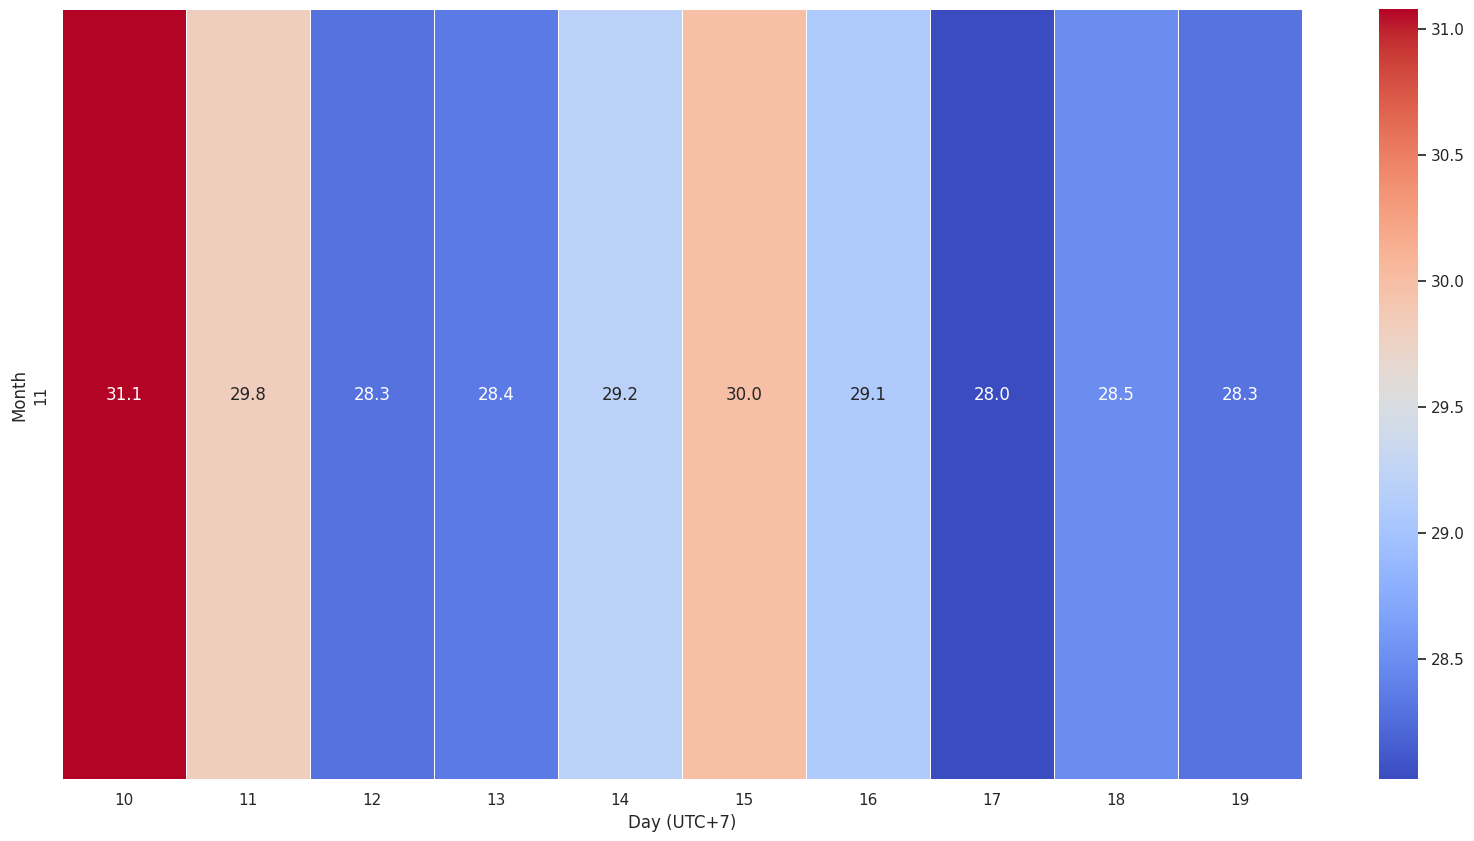

In [16]:
# Mengelompokkan data berdasarkan 'month' dan 'day', menghitung rata-rata suhu
datacuaca_grouped = datacuaca.groupby(['month', 'day']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap (sumbu X: hari, sumbu Y: bulan)
temperature_pivot = datacuaca_grouped.pivot(index='month', columns='day', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(20, 10))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Day (UTC+7)')
ax.set_ylabel('Month')

# Menampilkan heatmap
plt.show()


ValueError: zero-size array to reduction operation fmin which has no identity

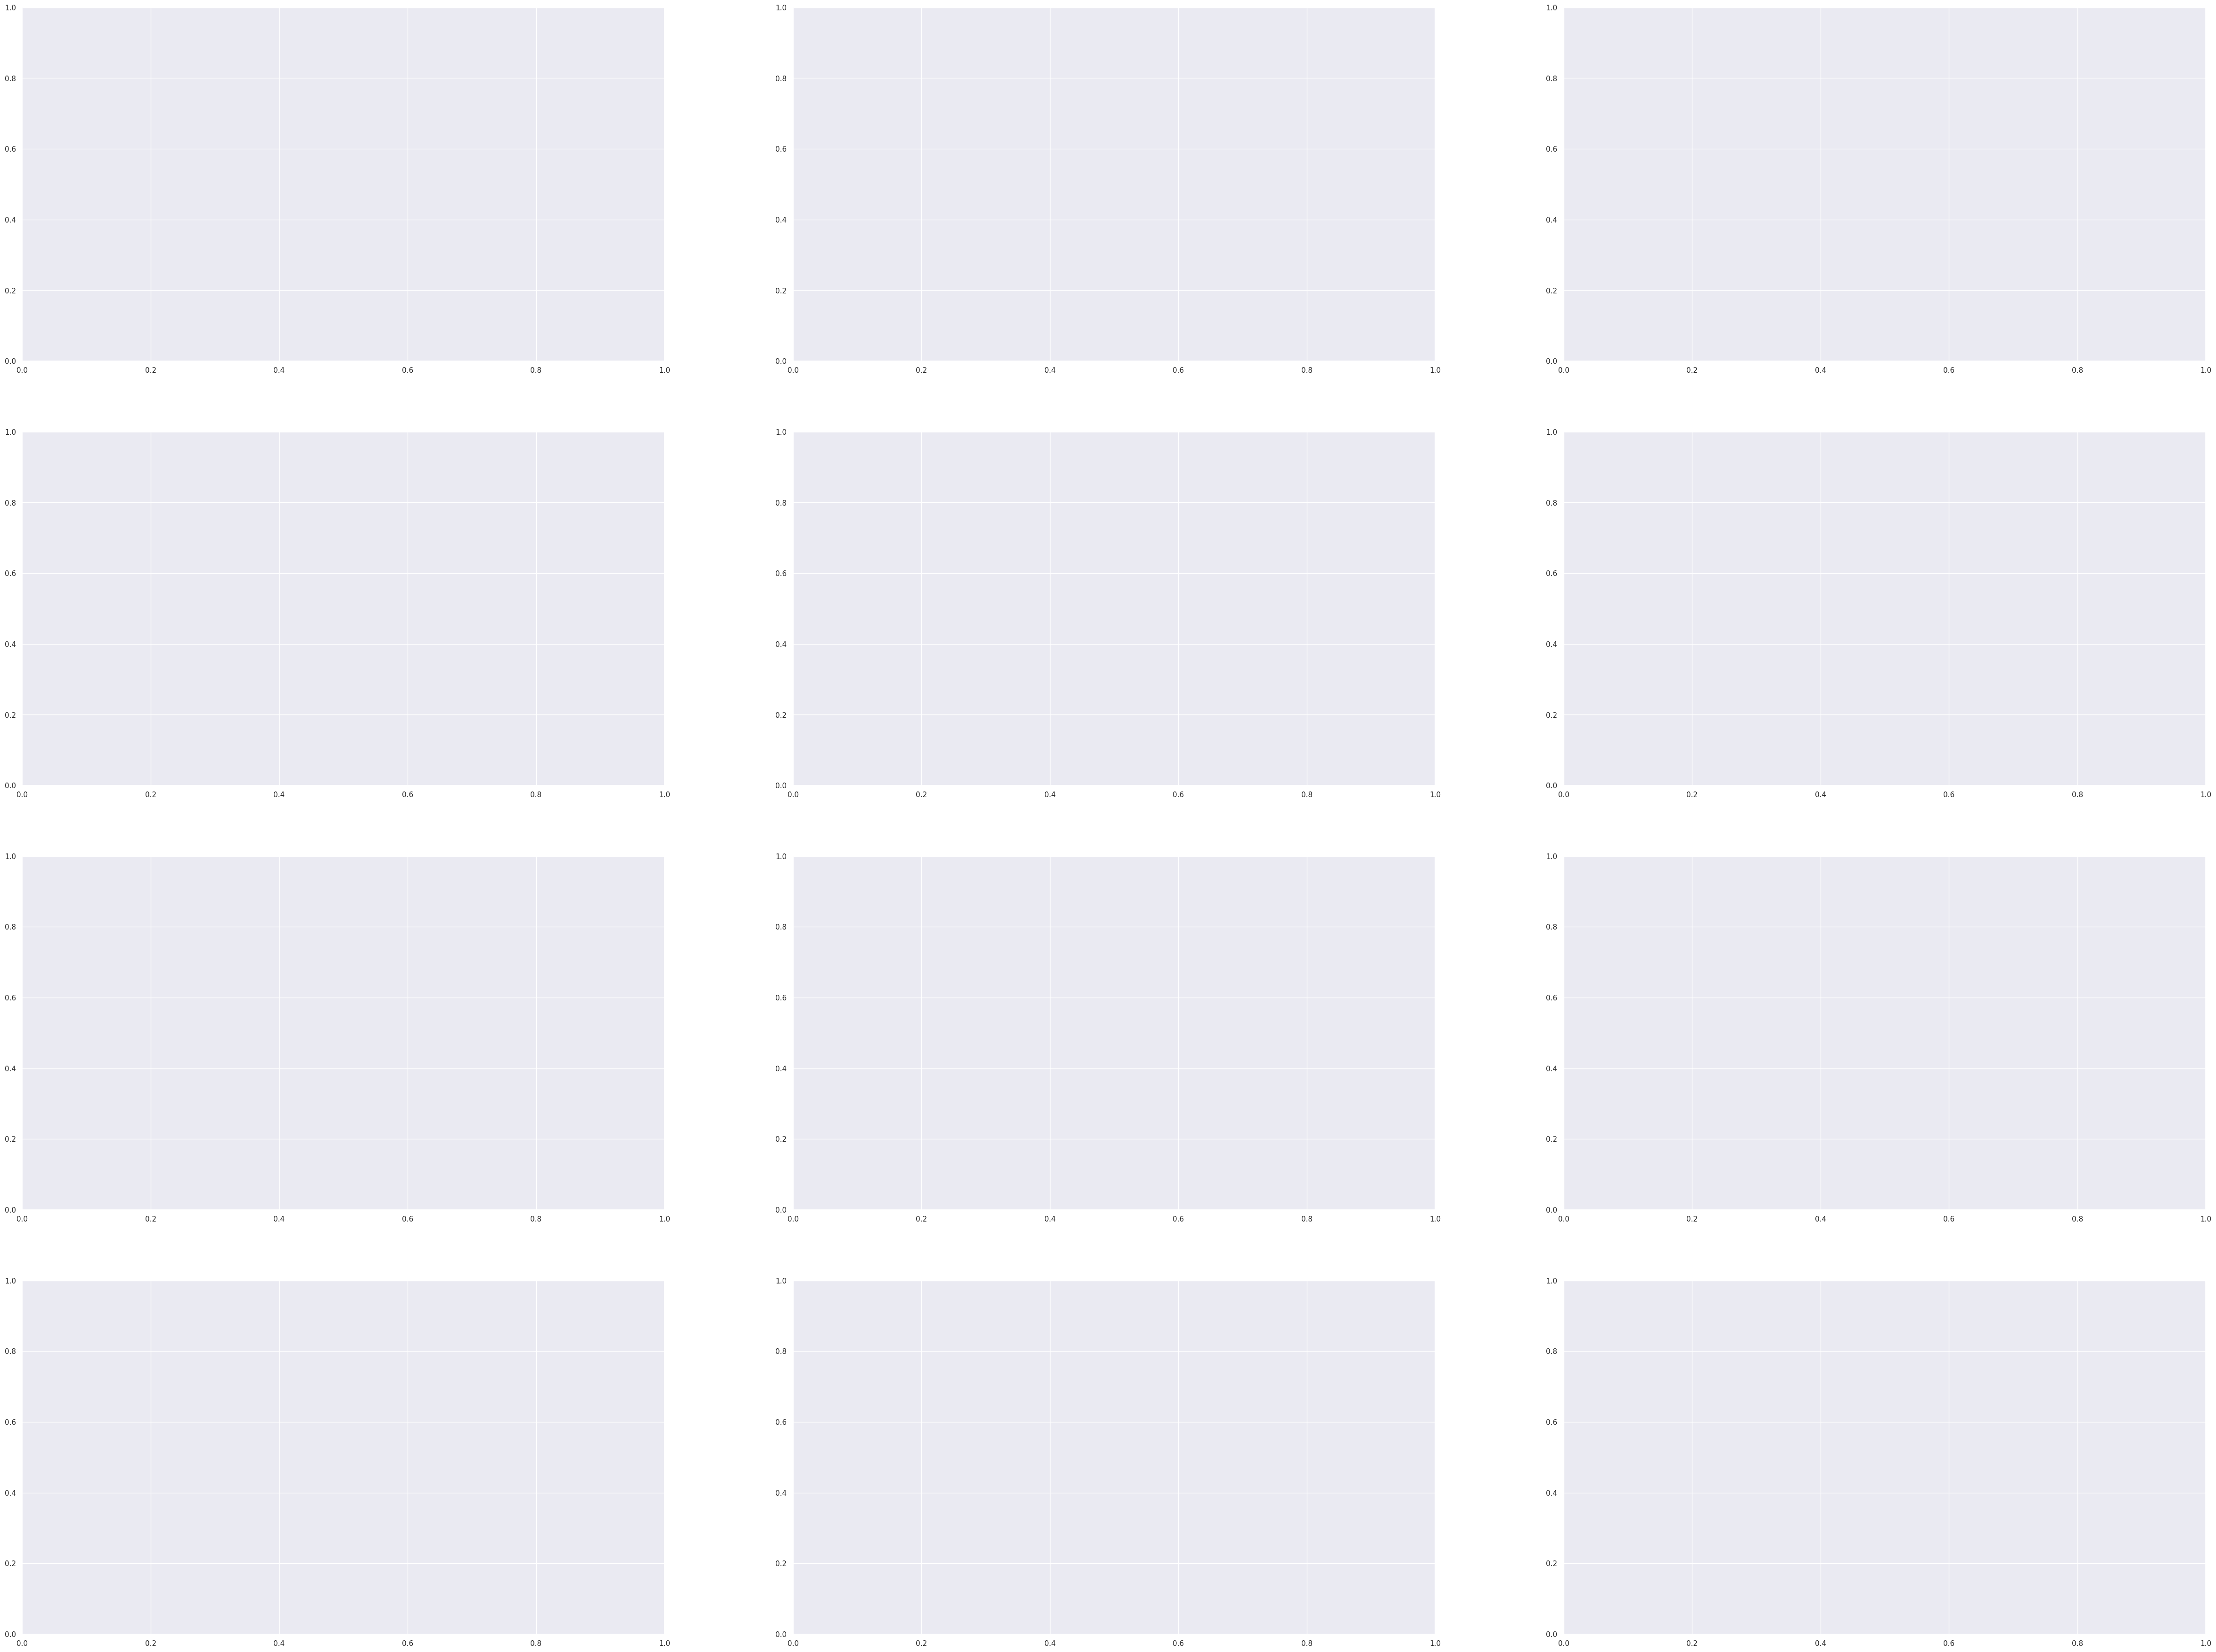

In [17]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']

# Menentukan rentang bulan dari Januari hingga September
months = range(1, 12)  # Bulan 1 hingga 9

# Mengatur ukuran grafik untuk menampung semua heatmap
fig, axs = plt.subplots(4, 3, figsize=(60, 45))
axs = axs.flatten()  # Meratakan array subplot untuk iterasi yang lebih mudah

# Looping untuk setiap bulan
for month in months:
    # Filter data untuk bulan tertentu
    monthly_data = datacuaca[(datacuaca['timestamp'].dt.year == 2024) & (datacuaca['timestamp'].dt.month == month)]

    # Mengurutkan data berdasarkan 'timestamp'
    monthly_data = monthly_data.sort_values(by='timestamp')

    # Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
    monthly_data['day'] = monthly_data['timestamp'].dt.day
    monthly_data['hour'] = monthly_data['timestamp'].dt.hour

    # Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
    datacuaca_grouped = monthly_data.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

    # Pivot dataframe untuk membuat format yang sesuai dengan heatmap
    temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

    # Membuat heatmap untuk bulan tersebut
    sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=axs[month-1], cmap="coolwarm")
    
    # Memberi judul pada heatmap
    axs[month-1].set_title(f'Temperature Heatmap for {month_names[month-1]} 2024')
    axs[month-1].set_xlabel('Hour of Day (UTC+7)')
    axs[month-1].set_ylabel('Day of Month')

# Mengatur layout
plt.tight_layout()

# Menampilkan heatmaps
plt.savefig("Heatmap_month.jpg")
plt.show()



In [18]:
pilih_tahun = 2024
pilih_bulan = 11

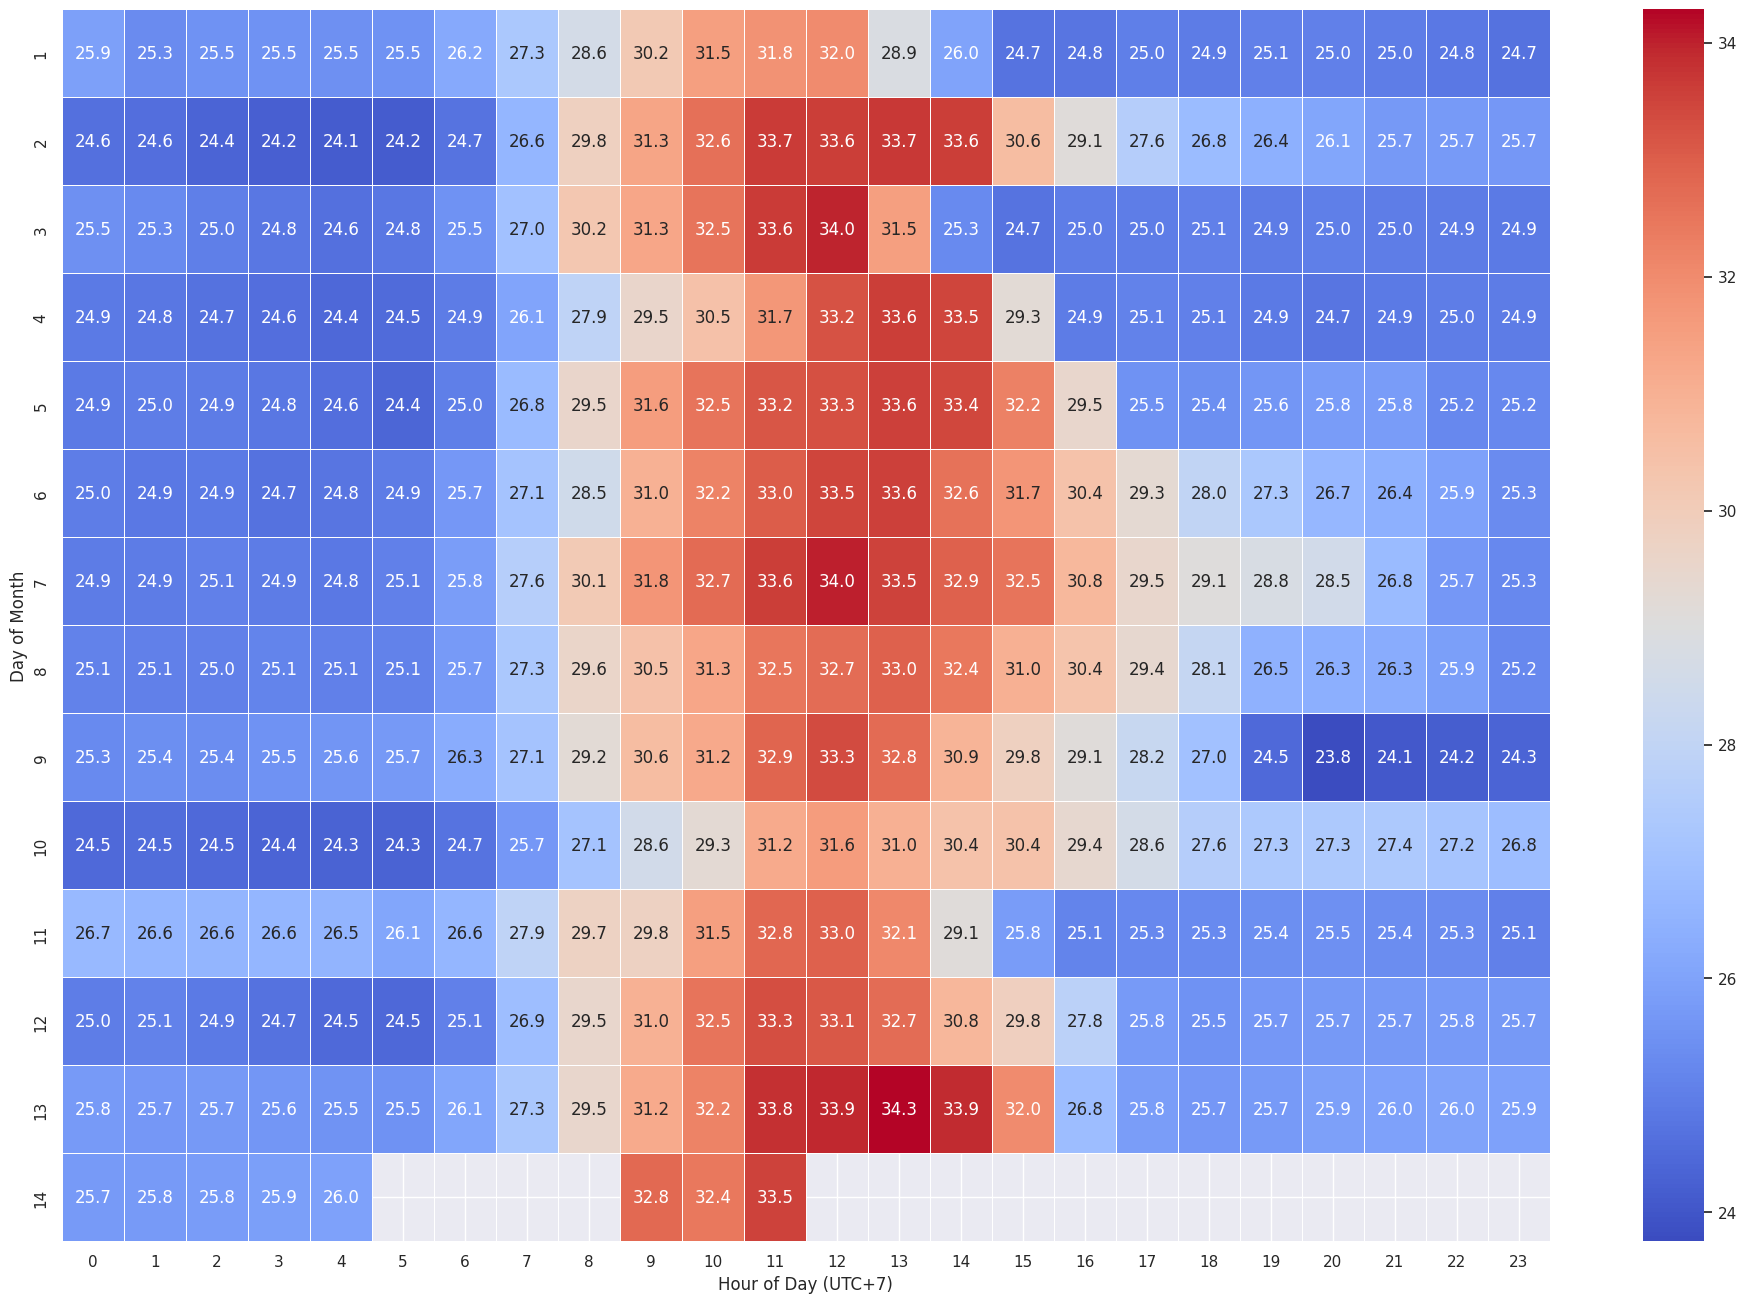

In [19]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.savefig("Temp_month.jpg")
plt.show()



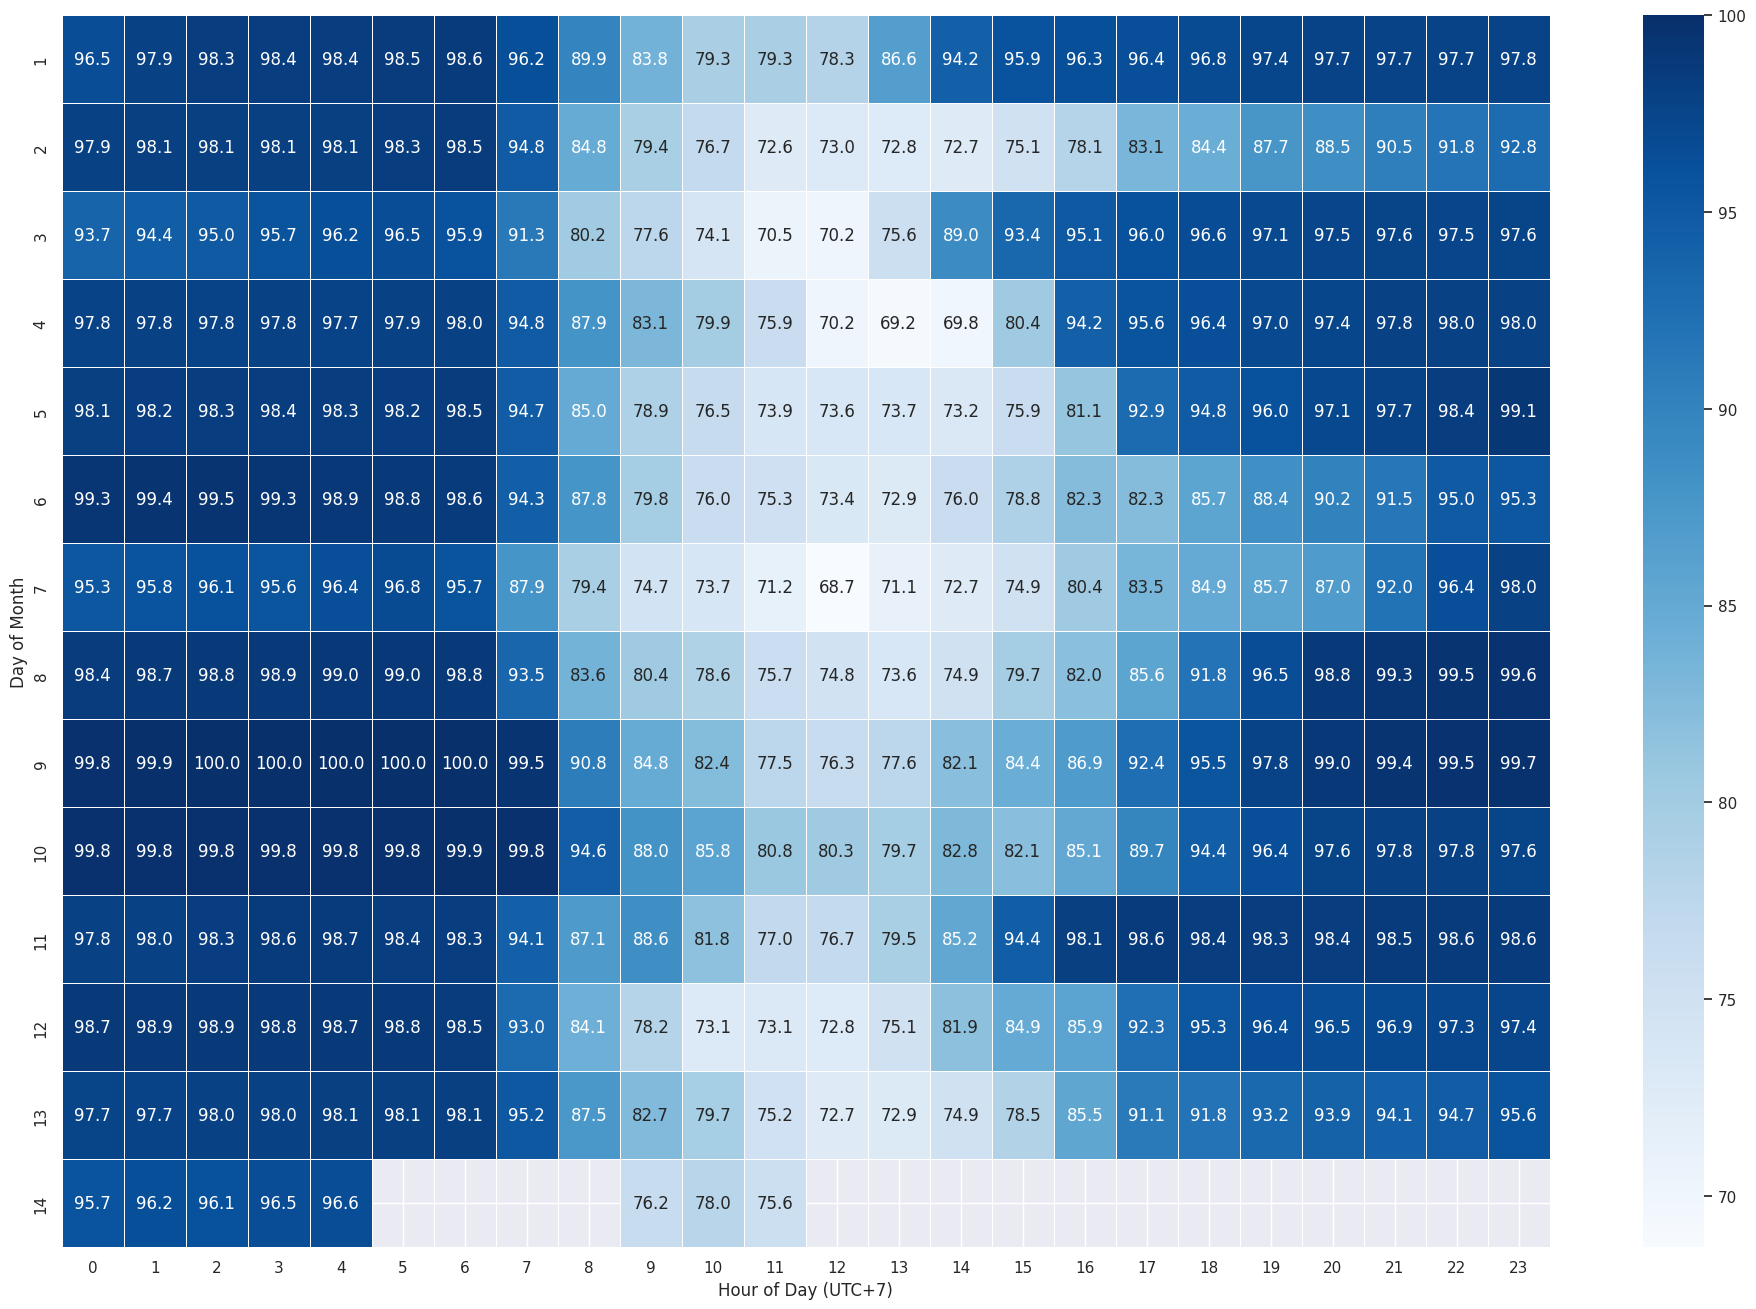

In [20]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'humidity': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
humidity_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='humidity')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(humidity_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="Blues")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.show()

Text(266.25, 0.5, 'Day of Month')

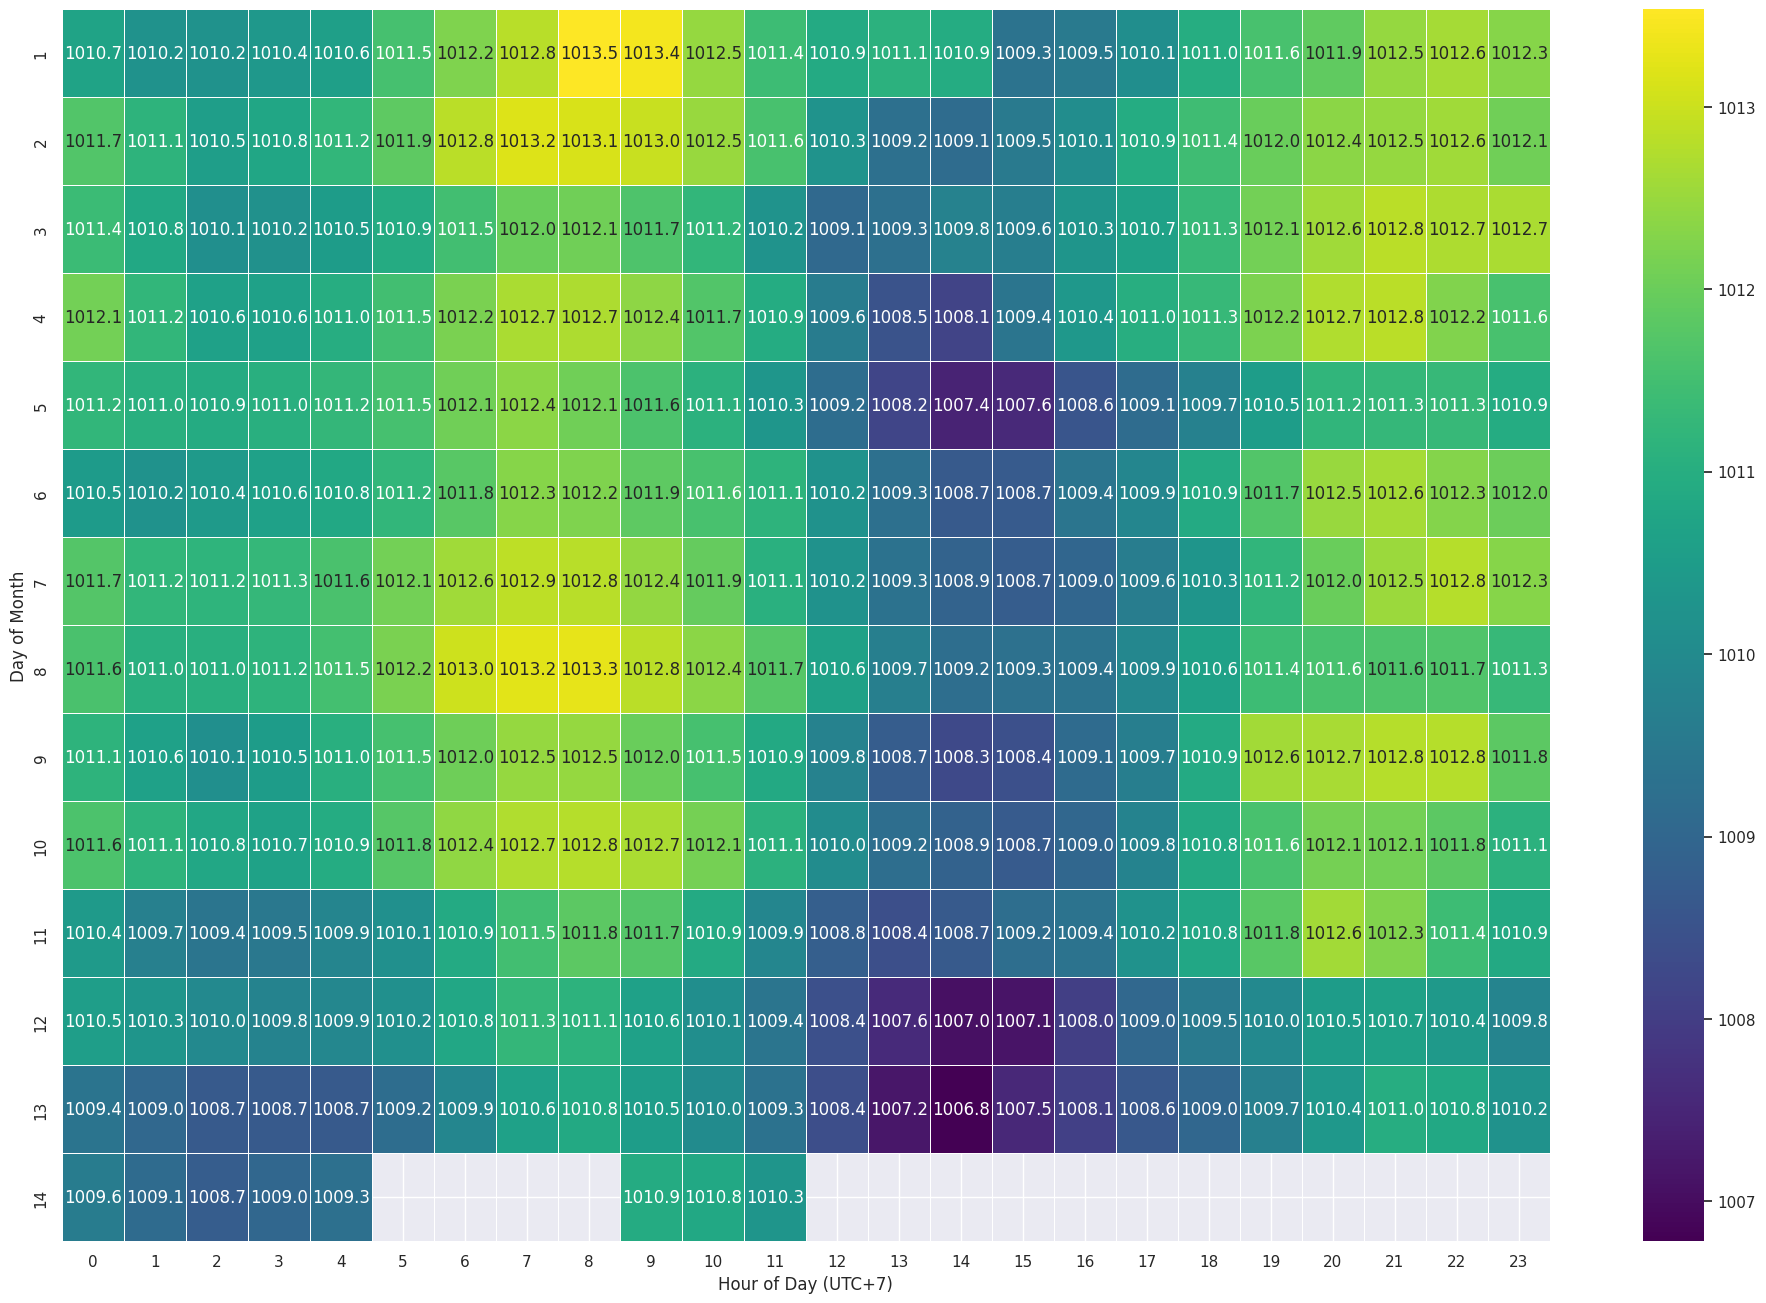

In [21]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'pressure': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
pressure_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='pressure')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(pressure_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="viridis")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

Text(266.25, 0.5, 'Day of Month')

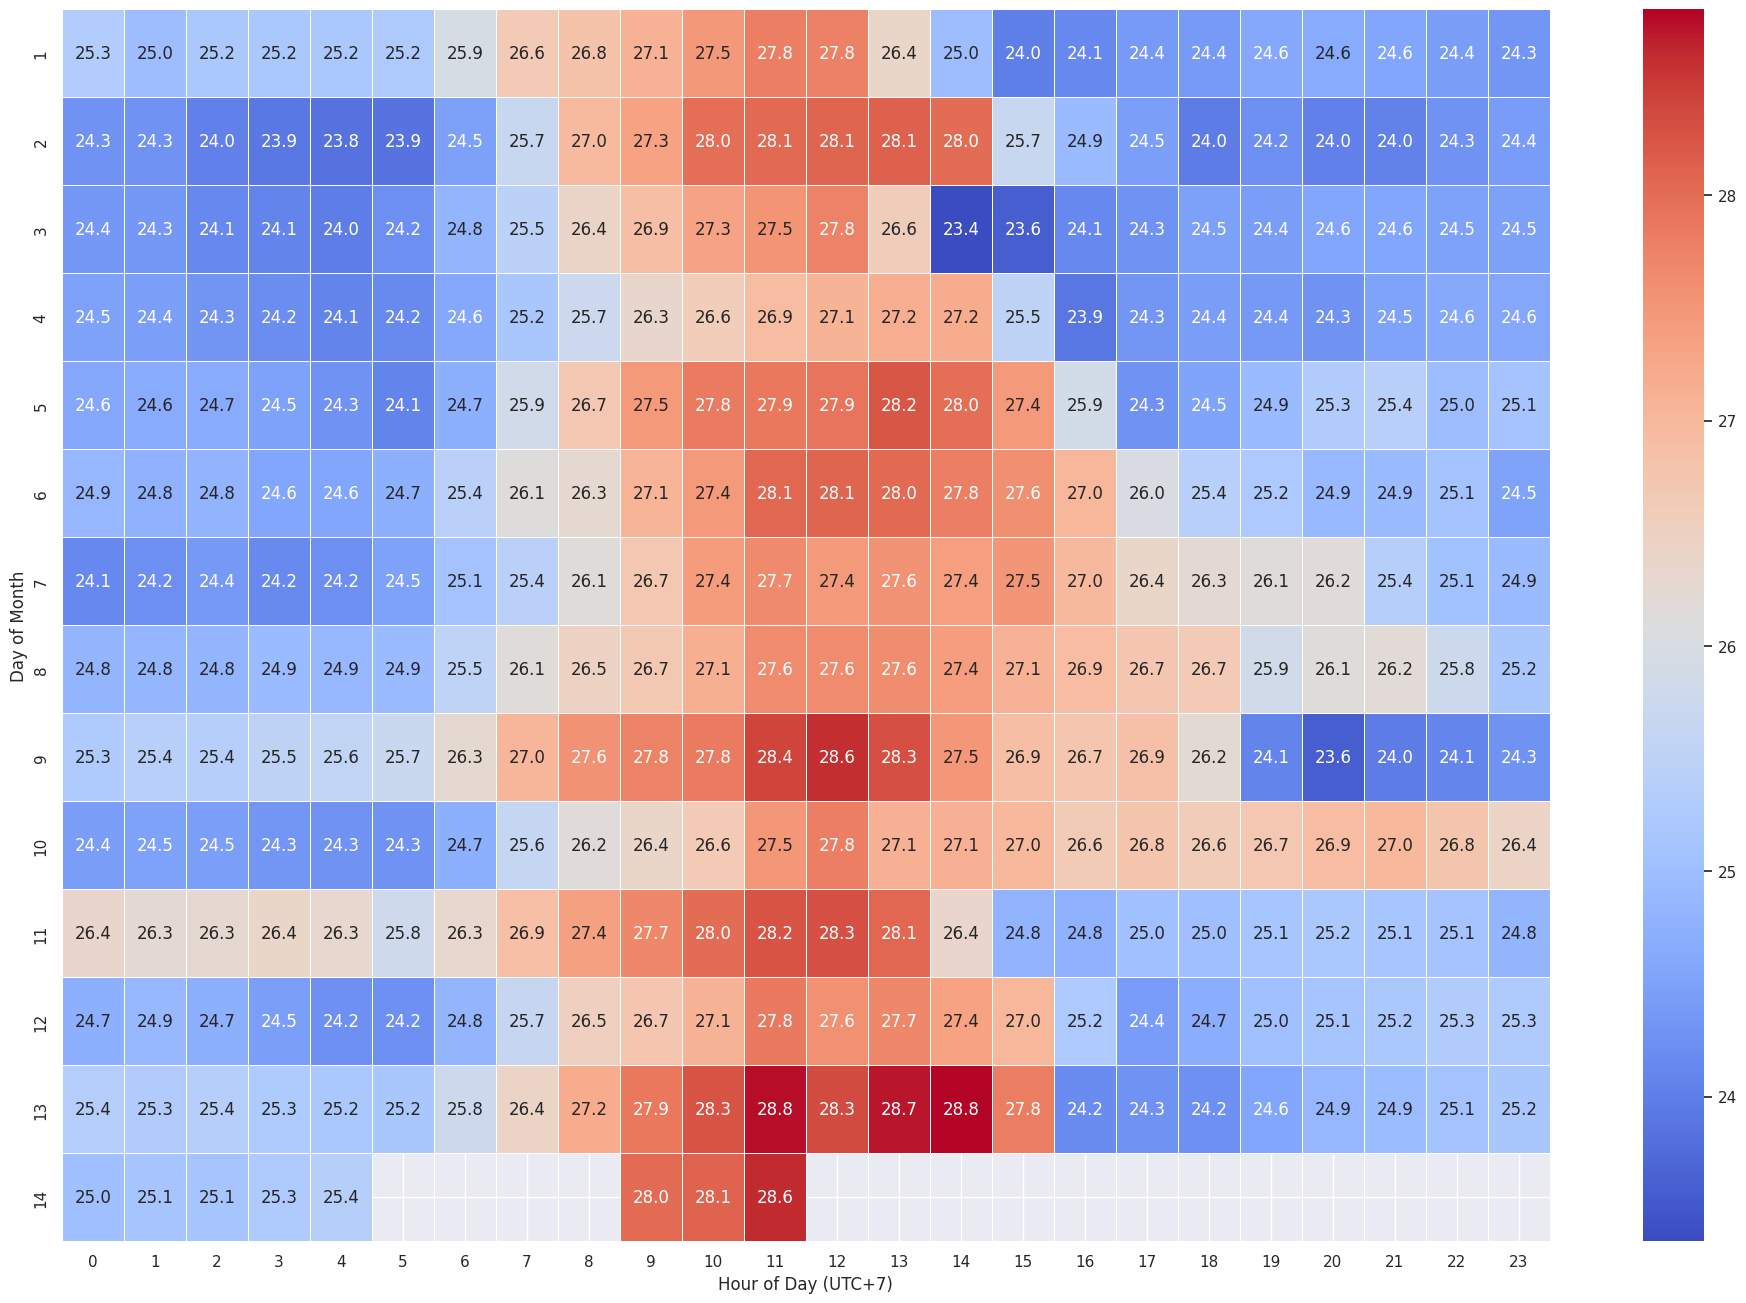

In [22]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'dew': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
dew_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='dew')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(dew_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>